<div><h1 align = 'center'>Восстановление зависимостей медианных частот F2 от индексов T</h1></div><div><h2 align = 'center'>Автор: Васильев Марат</h2></div><div><h3 align = 'center'>vasilyev-marat@ya.ru, +7(965)206-66-32</h3></div>
<div align = 'center' ><br><a href = 'https://github.com/maratdzhan/dependencies-F2-from-indices-T'>GitHub.Com</a></div>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import filedialog as fd
from scipy.stats.stats import pearsonr
import os

<div><h3 align = 'Center'>Инициализация переменных</h3></div>

In [14]:
COLUMNS = ['YEAR', 'HOUR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', \
           'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
## Копирование массива месяцев
MONTHS_ARR = COLUMNS[2:]
## Максимальный год, учитываемый при построении регрессии
MAX_YEAR = 2018
## Исследуемый год
OBS_YEAR = 2019
## Шаг по оси F2
yticks_value = 0.25
## Массив часов
HOUR_A = np.arange(0,24,1)

## Файлы с данными. Заданы по умолчанию, при загрузке - изменяется название
indices_filename = "ind.txt";
frequences_filename = "freq.txt";
result_file = "table_result.txt";

## Глобальные таблицы индексов и частот
data = pd.DataFrame();
data_tm = pd.DataFrame();

<div><h3 align = 'Center'>Перевод английских месяцев в русские</h3></div>

In [15]:
def RU_MON(MON):
    RM = ["Январь", "Февраль", "Март", "Апрель","Май","Июнь","Июль",
         "Август","Сентябрь","Октябрь","Ноябрь","Декабрь"];
    return (RM[MONTHS_ARR.index(MON)]);

<div><h3 align = 'Center'>Сохранение массива в таблицу</h3></div>

In [16]:
def SaveTable(data, filename, nl = 0):
    file = open(filename, 'w');
    for line in data:
        if (nl):
            line = str(line) + '\n';
        else:
            line = str(line);
        file.write(line);
    file.close()

<div><h3 align = 'Center'>Обработка индексов Т</h3></div>

In [17]:
## Открыть файл 
def GetIndicesFile():
    ## Выбор файла
    fn = fd.askopenfilename()
    if not fn:
        ## Если не выбран - берем им по умолчанию
        fn = indices_filename;
    else:
        ## Если выбран - парсим его
        ParseIndices(fn);
    indices_filename = fn;
    l1.config(text = "Файл индексов выбран");
    
## Парсинг файла индексов
def ParseIndices(file):
    ## Заготовка массива
    file_content = []
    ## Открываем файл индексов для чтения
    file_obj = open(file, 'r')
    ## Флаг таблицы
    table = False;
    ## Для всех строк файла
    for line in file_obj:
        ## Знак "=" означает начало и конец таблицы, 
        ## если он найден:
        if (line.find("=") != -1): 
            ## Меняем флаг на противоположный
            if (table):
                table = False;
            else:
                table = True;
        ## Если строка не флаг
        else:
            ## Если флаг таблицы активен
            ## (то есть сейчас данные таблицы в строках)
            if table:
                ## Обрезаем пробелы в начале и конце, добавляем перенос строки
                line = line.strip() + "\n";
                ## Добавляем в файл
                file_content.append(line);
    ## Как только обработали все строки - сохраняем в файл
    WriteIndices(file_content);
    
## Сохранение индексов
def WriteIndices(filec):
    ## для всех строк
    for i in range(0,len(filec)):
        ## Убираем символы ^ и *
        filec[i] = filec[i].replace('^', ' ').replace('*', ' ')
    ## Как убрали - сохраняем таблицу и принимаем ее "по умолчанию"
    SaveTable(filec, "ind.txt");
    indices_filename = "ind.txt";

<div><h3 align = 'Center'>Обработка частот F2</h3></div>

In [18]:
## Проверка, является ли строка символьной, 
## или содержит только числа
def FindWords(line):
    ## замена пробелов
    mystr = line.replace(' ', '')
    ## замена точек
    mystr = mystr.replace('.', '')
    ## замена переносов строки
    mystr = mystr.replace('\n', '')
    ## должны остаться только числа. если нет - эта строка не подходит
    t = mystr.isdigit()
    ## возращаем истину или ложь (подходит строка или нет)
    return ((t));

## Предобработка
def Preproc(filename):
    ## Заготовка массива
    temp_data_array = [];
    ## заготовка переменной
    year = 0
    ## открываем файл частот
    temp_data = open(filename, 'r');
    ## для всех строк файлов
    for line in temp_data:
        ## проверяем, является ли строка числовой
        if (FindWords(line)):
            ## Если числовая, то смотрим длину
            ## меньше 6 символов - это ГОД
            if (len(line) < 6):
                ## пишем, что год равен числу в этой строке
                year = line.replace('\n', '');
            ## больше 6 символов
            else:
                ## обрезаем лишние пробелы в начале и конце строки
                ## добавляем перенос строки
                line = line.strip() + "\n";
                ## Создаем строку ГОД + первоначальная строка
                line = year + " " + line
                ## добавляем строку к массиву
                temp_data_array.append(line);
    ## закрываем файл
    temp_data.close()
    ## сохраняем данные в таблицу
    SaveTable(temp_data_array, 'freq.txt');
    ## устанавливаем имя по умолчанию
    frequences_filename = "freq.txt";

## Инициализация файла частот
def GetFrequencesFile():
    ## получить имя файла
    fn = fd.askopenfilename()
    ## если не получили
    if not fn:
        fn = frequences_filename;
    ## если получили - парсим его
    else:
        Preproc(fn);
    frequences_filename = fn;
    l1.config(text = "Файл частот выбран");
    ##

<div><h3 align = 'Center'>Загрузка таблиц из файлов, удаление "артефактов" и запуск основного цикла расчета</h3></div>

In [19]:
## Обработка основного цикла
def SetDependencies():
    ## открываются файлы как таблицы
    data, data_tm = Import();
    ## удаляются пустые столбцы, если есть
    data = DropEmpty(data);
    data_tm = DropEmpty(data_tm);
    ## запуск основного цикла
    ## результатом будет массив - таблица
    ot = mainCycle(data, data_tm);
    ## сохраняем результат
    SaveTable(ot, result_file);

## Импорт обработанных данных
def Import():
    ## Открыть таблицу частот, разделитель - пробел, имена столбцов из массива COLUMNS
    ## пропуск двойных пробелов, вместо индексов - столбец YEAR
    data_tm = pd.read_csv(frequences_filename, sep = ' ', \
                     names = COLUMNS, skipinitialspace = True, index_col = 'YEAR')
    ## Для таблицы индексов другие имена столбцов
    fcd = ['YEAR', 'JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    ## Открыть как таблицу файл индексов, разделитель - пробел, имена из массива fcd
    ## пропускаем двойные пробелы, вместо индексов - столбец YEAR
    data = pd.read_csv(indices_filename, sep = ' ', names = fcd, skipinitialspace = True,  index_col = 'YEAR')
    return data, data_tm;
    
## Выбрасываем пустые столбцы
def DropEmpty(data):
    l1.config(text = "Приведение данных к табличному виду");
    ## Для всех столбцов таблицы data
    for i in data.columns:
        # если такого имени столбца нет в массиве COLUMNS 
        if (i not in COLUMNS):
            ## Выбросить столбец
            data.drop(i, axis = 1, inplace = True)
    return data;

<div><h3 align = 'Center'>Построение гиперболы</h3></div>

In [20]:
def cube_funct(coefficients, arguments):
    ## Получили 4 коэффциеинта и массив аргументов.
    ## Методами numpy перемножаем их
    f = (coefficients[0]+coefficients[1]*arguments+\
        coefficients[2]*(arguments**2)+coefficients[3]*(arguments**3))
    ## Возвращаем массив значений функции
    return f;

<div><h3 align = 'Center'>Отрисовка данных</h3></div>

In [21]:
#### Отрисовка графиков
##
## на вход массивы t, f2 - индексы и частоты измеренные
## x, y - индексы и частоты посчитанные
## correlation_coeff - коэффициенты регрессии
## points - точки [предсказанные [T, F2], фактические [T, F2]]
## MONTHS, HOURS - месяцы и часы, для которых строится график
## path - путь, куда сохраняются графики
## isShow - показывать ли графики (notebook позволяет смотреть)
## label1, label2 - имена функций
def Plotting(t, f2, x, y,  ccs, correlation_coeff, points, MONTHS, HOURS, path, isShow = False,\
             label1 = 'f2(t)', label2 = 'cubic regression'):
    
    #### Построение фигуры
    ## Размер рисунка
    plt.figure(figsize=(15,10))
    ## Данные
    ## f2(t) зеленым цветом, метки - треугольник, имя из label1, прозрачность 0.75
    plt.plot(t, f2,'g^',label=label1, alpha = 0.75)
    ## y(x) красным, точки, имя из label2, прозрачность 75%
    plt.plot(x, y, 'r.', label=label2, alpha = 0.75)
    ## Точка предсказанная, синяя, ромб, имя и координаты
    plt.plot(points[0, 0],points[0, 1], 'bD',\
             label = '2019 prediction ({};{})'.format(points[0,0], points[0,1]));
    ## Точка фактическая, фиолетовая, маркер - плюс, имя и координаты
    plt.plot(points[1, 0],points[1, 1], color = 'magenta', marker ='P',\
             label = "2019 factual ({};{})".format(points[1,0], points[1, 1]));
    ## Сетка синяя, прорачность 15%
    plt.grid(True, color = 'blue',alpha = 0.15)
    ## Тексты:
    ## Уравнение гиперболы с коэффцициентами, коэф Пирсона
    plt.annotate("foF2$_m$$_e$$_d$ = ({:.3e})$T^3$ + ({:.3e})$T^2$ + ({:.3e})$T$ + {:.4f}, \n\n\
    Pearson's correlation coefficient: {:.4f}".format(ccs[3],ccs[2],ccs[1],ccs[0], correlation_coeff),\
             xy=(0, 1), xytext=(12, -12), va='top',\
             xycoords='axes fraction', textcoords='offset points', fontsize = 16)
    
    ## Заголовки
    ##
    ## имя рисунка
    plt.title("{}, {} o'clock".format(MONTHS, HOURS), fontsize= 20)
    ## подпись оси аргументов
    plt.xlabel("Индексы T", fontsize = 16)
    ## подпись оси ординат
    plt.ylabel("Медианные частоты F2, МГц", fontsize = 16)
    ## Легенды: положение и размер шрифта
    plt.legend(loc = 'lower right', fontsize = 16)
    
    ## Команда сохранения и отображения графика
    ##
    ## если папки не существует
    if not (os.path.exists(path)):
        ## создать
        os.mkdir(path)
    ## генерация имени файла
    name = path + '/' + MONTHS + '-' + str(HOURS) + '.png'
    ## сохранить график
    plt.savefig(name)
    ## если надо показать - показываем
    if isShow:
        plt.show()
    ## закрываем рисунок
    plt.close()

<div><h3 align = 'Center'>Цикл перебора всех часов и месяцев</h3></div>

In [22]:
def mainCycle(data, data_tm, path = 'graphs'):
    ## Заготовка таблицы с результатом
    out_table = [];
    out_table.append("Month,Hour,a,b,c,d,Pearson R,dF\n")
    dF2 = [];
    ## Итерируемся по месяцам (столбцам таблицы Tindeces)
    for MON in data.columns:
        # Вторая итерация по часам (То ест мы для каждого месяца делаем итерации по каждому часу)
        for HRS in range(0,24,1):
            ## выбираем из таблицы частот нужные часы и года и смотрим, чтобы значения не были 0
            dF = data_tm.query('HOUR == @HRS & YEAR <= @MAX_YEAR & {} > 0'.format(MON))[MON]
            ## Для тех годов, которые есть в таблице частот, делаем выборку из таблицы индексов
            dT = data.loc[data.index.isin(dF.index)][MON]
            #### Извлечение данных из таблицы
            ##
            ## Получение данных t и f
            t = dT.values[:]
            f = dF.values[:]
            ## Перевод в массивы
            t1 = np.array(t);
            f1 = np.array(f);
            ## Запаковка в пары (x, y)
            z = zip(t,f)
            z1 = zip(t1,f1);
            ## Очистка данных от шумов
            f.sort()
            t.sort()
            ## Упорядочивание пар
            zs = sorted(z, key = lambda tup: tup[0])
            zs1 = sorted(z1, key = lambda tup: tup[0])
            ## Обратная распаковка очищенных данных и упорядоченных данных
            f = [z[1] for z in zs]
            t = [z[0] for z in zs]
            f1 = [z1[1] for z1 in zs1]
            t1 = [z1[0] for z1 in zs1]
            ## Перевод данных в массивы
            t1 = np.array(t1)
            t = np.array(t)
            
            ## Определение параметров функции для кубической апроксимации ##
            ##
            ## Сетка решения на статистически очищенной выборке
            lv = np.arange(-30, t[len(t1) - 1] + 20, 1)
            ## Расчет коэффициентов кубического уравнения
            ## функция polyfit библиотеки numpy
            tt = np.polyfit(t, f, 3)
            ## Разворот вектора (т.к он идет в обратном направлении..)
            tt = list(reversed(tt))
            ## Построение гиперболы (см. функцию cube_funct)
            cube_polyfit = cube_funct(tt,lv)
            ## расчет коэффициента Пирсона (функция pearsonr библиотеку scipy.stats)
            corr_coeff = pearsonr(t1, f1)[0]
            ## Данные для таблицы результатов: упорядочиваем и запаковываем в строку
            accumulated_info = "{},{},{:.5e},{:.5e},{:.5e},{:.5f},{:.5f}\
            \n".format(MON, HRS, tt[3], tt[2], tt[1], tt[0], corr_coeff)
            
            #### Точки на графике
            ## PREDICT - предсказание
            ## Для выбранного часа и исследуемого года
            dFP = data_tm.query('HOUR == @HRS & YEAR == @OBS_YEAR & {} != "NaN"'.format(MON))[MON]
            ## Соответственно частоте выбираем индекс Т
            dTP  = data.loc[data.index.isin(dFP.index)][MON]
            ## Распаковка, расчет с известными коэффициентами, запаковка
            kp = dTP.values[:]
            resp = cube_funct(tt, kp)
            predict = np.array([kp,resp])
            ## для k получили f2(k)
            ## FACT
            ## Данные уже распакованы - просто запаковываем фактические данные
            fact = np.array([dTP.values[:],dFP.values[:]])
            points = np.array([predict,fact])
            # для k получили f2(k)
            devF = fact[1,0] - predict[1,0];
            dF2.append(devF);
            accumulated_info = "{},{},{:.5e},{:.5e},{:.5e},{:.5f},{:.5f},{:.5f}\
            \n".format(MON, HRS, tt[3], tt[2], tt[1], tt[0], corr_coeff, devF)
            ## Добавляем данные результатов в таблицы
            out_table.append(accumulated_info)
            ## Передаем функции отрисовки графиков
            Plotting(t1, f1, lv, cube_polyfit, tt, corr_coeff, points, MON, HRS, path, False)
    mdF = np.mean(dF2);
    ddF = np.var(dF2);
    s = "mean dF value: {}\n var dF value: {}".format(mdF, ddF);
    md_data = np.array([s])
    SaveTable(md_data, "statistic.txt",1);
    SaveTable(dF2, "dF2_values.txt",1);
    return out_table;

<div><h3 align = 'center'>Обработка результатов дневного хода медианной частоты F2 для фиксированного индекса T</h3></div>

In [23]:
def GetDaily(T_val, path_dir = "daily_graph"):
    rt = pd.read_csv(result_file);
    F2 = []
    for MON in MONTHS_ARR:
        mon_tab = rt.query('Month == @MON');
        for HR in HOUR_A:
            koef = list(reversed(mon_tab.iloc[HR,2:6].to_list()))
            F2.append(cube_funct(koef, T_val));
        plt.figure(figsize = (14,10));
        plt.plot(HOUR_A, F2, 'b-o');
        plt.title("Дневной ход медианной частоты F2 для месяца {} при индексе T = {}"\
                  .format(RU_MON(MON), T_val));
        plt.grid(color = 'blue', alpha = 0.2);
        plt.xlabel("Время суток, ч.", fontsize = 16)
        plt.ylabel("Медианные частоты F2, МГц", fontsize = 16)
        plt.xticks(HOUR_A)
        plt.yticks(np.arange(min(F2), max(F2) + yticks_value, yticks_value))
        if not (os.path.exists(path_dir)):
            os.mkdir(path_dir)
        path = path_dir + '/' + str(MONTHS_ARR.index(MON)) + '_' + MON + '_' + str(T_val) + '.png'
        plt.savefig(path);
        plt.close();
        F2.clear();

<div><h3 align = 'center'>Отрисовка интерфейса, инициализация программы</h3></div>

In [24]:
## Параметры окна
root = Tk()
root.title("F2P")
f = Frame()

## Мини-интерфейс
text_info = "Программа запущена"
l1 = Label(bg="lightgreen", width=30, height=5, text = text_info)
bi = Button(text="Загрузить файл индексов", command=GetIndicesFile);
bf = Button(text="Загрузить файл частот", command=GetFrequencesFile);
br = Button(text="Запуск расчета", command = SetDependencies);

## Упаковка элементов интерфейса
l1.pack(padx = 10, pady = 10);
bi.pack(padx = 10, pady = 10);
bf.pack(padx = 10, pady = 10);
br.pack(padx = 10, pady = 10)

root.mainloop()

<div><h3 align = 'center'>Примеры графиков результатов:</h3></div>

<br><div>Ниже приведены 3 примера для различных моментов суток в разные времена года, которые отражают различную степень кривизны данных. Из графиков видно, что модель кубической регрессии является достаточно точной и хорошо описывает данные измерений.</div><div>Программа не предусматривает точечный расчет, поэтому в рамках демонстрации показаны уже посчитанные данные, однако любопытный исследователь может вопроизвести графики путем собственного исследования с помощью имеющихся данных.</div>

In [25]:
from IPython.display import Image

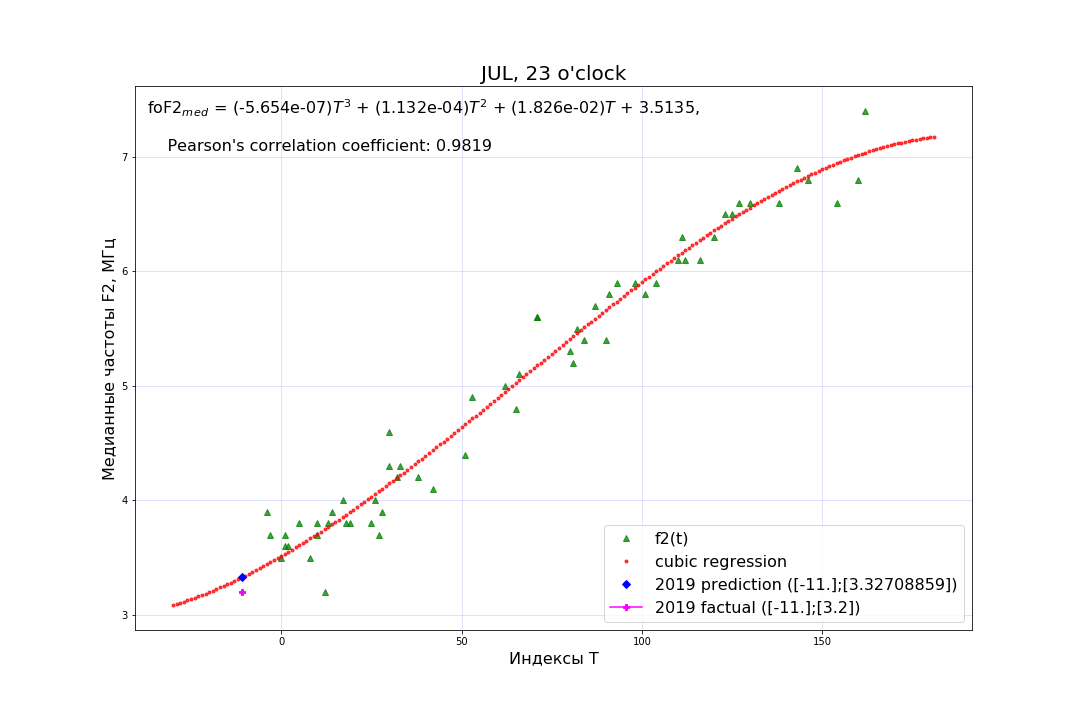

In [26]:
Image("graphs/JUL-23.png")

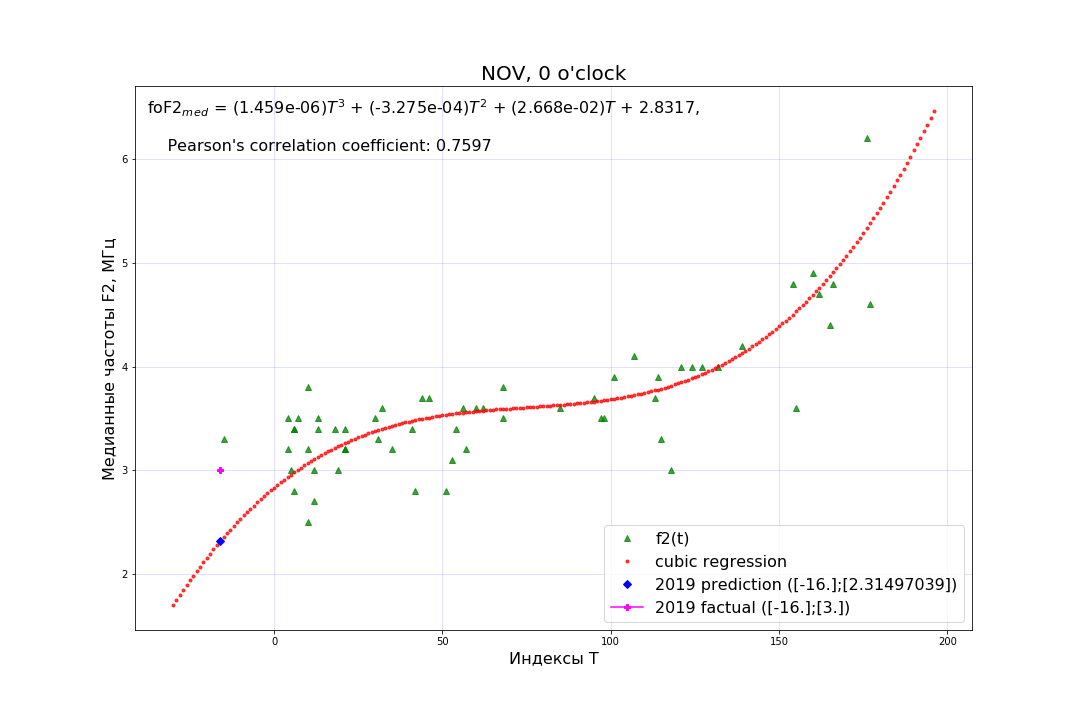

In [27]:
Image("graphs/NOV-0.png")

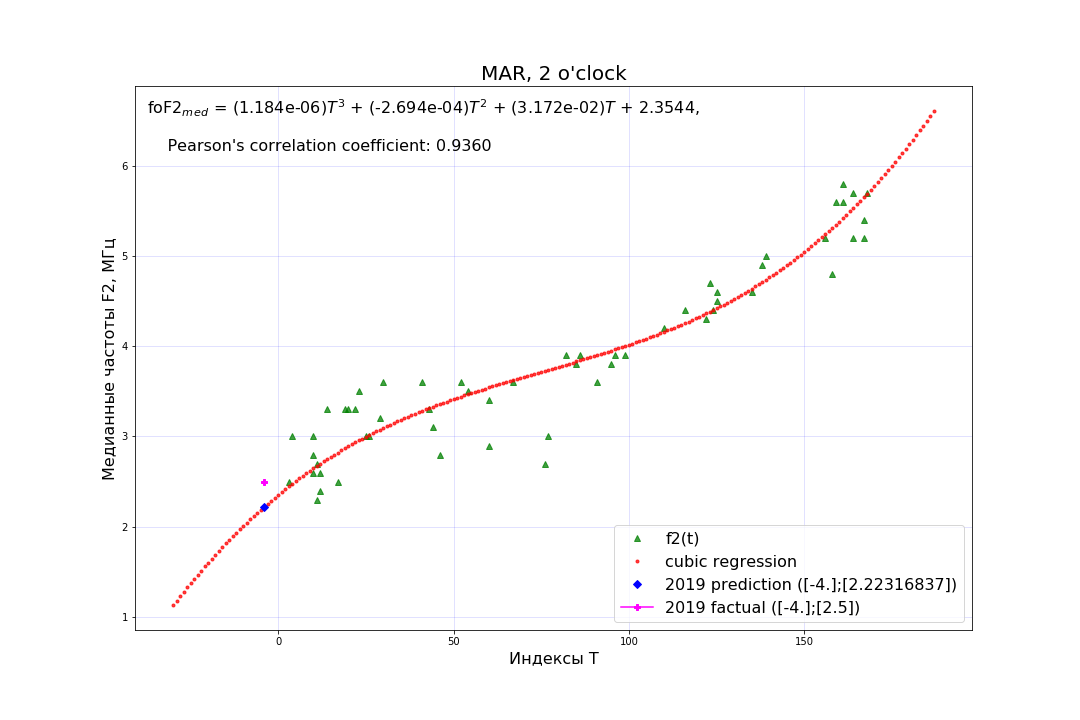

In [28]:
Image("graphs/MAR-2.png")

<br><div>
    <h3 align = 'center'>
        Пример графика дневного хода.
    </h3>
    Ниже приведен пример кода, который создаст папку "graph_example", в которой будет создано 12 графиков для каждого месяца. Графики строятся на основе таблицы, которая создается после выполнения расчета общего назначения. На каждом из графиков будет отображено суточное изменение медианной частоты F2 для каждого месяца при фиксированном значении индекса T = 18.
</div>

In [29]:
GetDaily(18, "graphs_example")

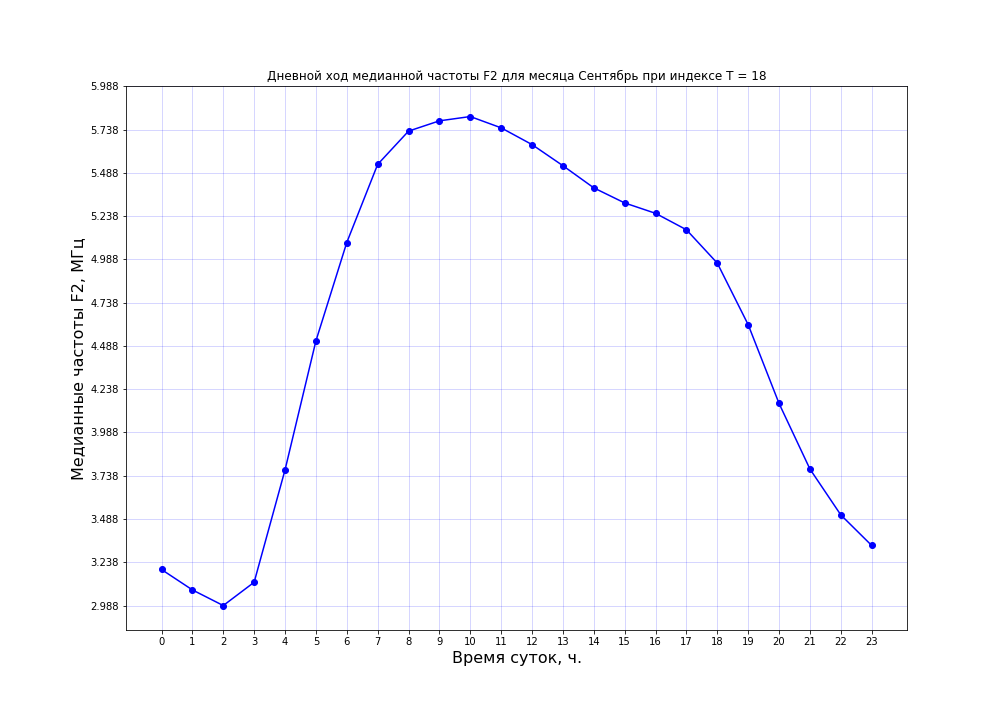

In [30]:
Image("graphs_example/8_SEP_18.png")